In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df_dbscan = pd.read_csv('bank_personal_loan.csv', delimiter=';')

In [35]:
df_dbscan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
df_dbscan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [37]:
df_dbscan.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4472,4473,50,25,90,95616,1,2.8,2,0,0,0,0,1,0
2717,2718,23,-2,45,95422,4,0.6,2,0,0,0,0,1,1
4747,4748,49,25,91,94704,4,1.4,2,0,0,0,0,1,0
1769,1770,60,36,62,94061,4,2.2,1,0,0,0,0,0,0
2140,2141,53,27,89,92130,1,0.8,3,0,0,1,0,1,0


In [38]:
df_dbscan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [39]:
df_dbscan.shape

(5000, 14)

In [40]:
df_dbscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [41]:
df_dbscan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [42]:
df_dbscan.duplicated().sum()

0

In [43]:
df_dbscan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [44]:
df_dbscan.drop('ID', axis = 1, inplace=True)

In [45]:
df_dbscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [46]:
# sns.set_context('notebook')
# sns.set_style('white')
# fig = sns.pairplot(df_dbscan)


<h4>Comme indiqué ci-dessus, il existe une forte corrélation entre les caractéristiques suivantes :</h4>
<ul>
    <li>Experience et age</li>
    <li>Income et credit card average spending</li>
    <li>Income et mortgage balance</li>
</ul>

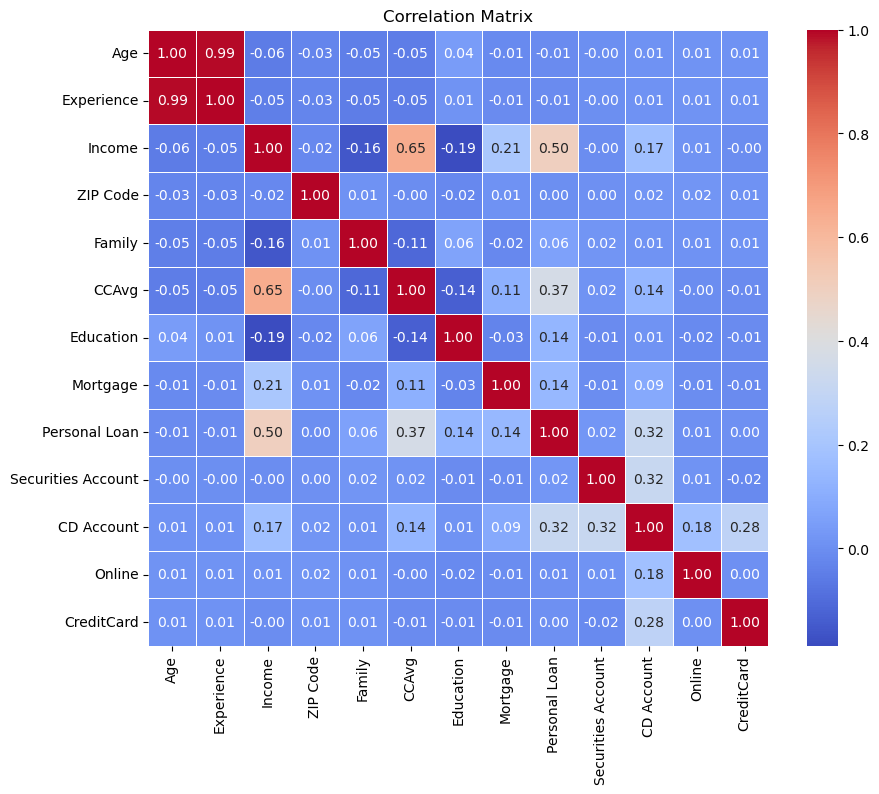

In [47]:
correlation_matrix = df_dbscan.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h4>Cette matrice de corrélation fournit des informations sur les relations entre différentes variables de votre ensemble de données.</h4>
<ol>
    <li><b>Age et Experience :</b></li>
        <ul>
            <li>Il existe une corrélation très forte et positive entre l'âge et l'expérience (environ 0,99), ce qui est attendu car l'expérience augmente généralement avec l'âge.</li>
        </ul>
    <li><b>Income :</b></li>
        <ul>
            <li>Le revenu présente une faible corrélation négative avec l'âge et l'expérience, ce qui est probablement dû au fait que les jeunes ont généralement des revenus plus faibles.</li>
            <li>Le revenu présente une corrélation positive modérée avec les dépenses moyennes par carte de crédit (CCAvg) et une faible corrélation positive avec le solde hypothécaire.</li>
        </ul>
    <li><b>Familly :</b></li>
        <ul>
            <li>Il y a une faible corrélation négative entre la taille de la famille et le revenu, ce qui suggère que les familles plus nombreuses ont peut-être des revenus légèrement inférieurs en moyenne.</li>
            <li>La taille de la famille ne montre pas de corrélations significatives avec les autres variables dans le sous-ensemble fourni.</li>
        </ul>
    <li><b>CCAvg</b></li>
        <ul>
            <li>CCAvg présente une corrélation positive modérée avec le revenu, ce qui indique que les personnes ayant des revenus plus élevés ont tendance à dépenser plus par carte de crédit.</li>
            <li>Il n'y a pas de corrélations fortes entre CCAvg et les autres variables, bien qu'il y ait une légère corrélation négative avec la taille de la famille.</li>
        </ul>
    <li><b>Education</b></li>
        <ul>
            <li>L'éducation montre une faible corrélation négative avec le revenu, ce qui suggère que des niveaux d'éducation plus élevés pourraient être associés à des revenus légèrement inférieurs dans cet ensemble de données.</li>
        </ul>
    <li><b>Mortgage</b></li>
        <ul>
            <li>Le solde hypothécaire (Mortgage) présente une corrélation positive modérée avec le revenu, ce qui suggère que les personnes ayant des revenus plus élevés ont tendance à avoir des soldes hypothécaires plus élevés.</li>
            <li>Il ne montre pas de corrélations significatives avec les autres variables de ce sous-ensemble.</li>
        </ul>
    <li><b>Autres Variables :</b></li>
        <ul>
            <li>Le Prêt Personnel (Personnal Loan) et le Compte à Terme (CD Account) présentent des corrélations positives modérées avec le revenu, ce qui indique que les personnes ayant des revenus plus élevés sont plus susceptibles de contracter des prêts personnels ou d'ouvrir des comptes à terme.</li>
            <li>Les variables en ligne (Online) et de carte de crédit (CreditCard) montrent des corrélations faibles avec les autres variables de ce sous-ensemble.</li>
        </ul>
</ol>

<h1>DBSCAN</h1>

<p style="font-size: 16px">DBSCAN, ou Density-Based Spatial Clustering of Applications with Noise, est un algorithme de clustering largement utilisé en apprentissage automatique pour sa capacité à découvrir des clusters dans des ensembles de données de formes et de tailles variables, même en présence de bruit et de valeurs aberrantes. Contrairement aux algorithmes de clustering traditionnels tels que K-means, DBSCAN fonctionne sur la base du concept de densité plutôt que de distance. Il catégorise chaque point de données comme un point central, un point de bordure ou du bruit, en fonction de la densité de son voisinage. Les points centraux sont ceux avec un nombre minimum de points à l'intérieur d'un rayon spécifié, tandis que les points de bordure se trouvent dans le voisinage des points centraux mais ne remplissent pas eux-mêmes les critères de densité. Les points de bruit sont ceux qui n'appartiennent à aucun cluster. L'algorithme parcourt l'ensemble de données, formant des clusters autour des points centraux et assignant les points de bordure à ces clusters. DBSCAN ne nécessite pas que le nombre de clusters soit prédéfini, ce qui le rend adapté aux ensembles de données où le nombre de clusters est inconnu. Ses paramètres clés, eps et min_samples, contrôlent la taille du voisinage considéré pour le clustering.</p>>

<h3>Paramètres requis pour l'algorithme DBSCAN</h3>


![DBSCAN](https://i.imgur.com/W5luu0I.png)


<ol style="font-size: 16px">
    <li><b>
eps</b>: Il définit le voisinage autour d'un point de données, c'est-à-dire si la distance entre deux points est inférieure ou égale à « eps », alors ils sont considérés comme des voisins. Si la valeur de eps est choisie trop petite, une grande partie des données sera considérée comme une valeur aberrante. Si elle est choisie très grande, les clusters se fusionneront et la majorité des points de données seront dans les mêmes cluster.</li>
    <li><b>min_samples:</b> Nombre minimum de voisins (points de données) dans un rayon eps. Plus le jeu de données est grand, plus la valeur de MinPts doit être grande. En règle générale, le nombre minimum de MinPts peut être dérivé du nombre de dimensions D dans le jeu de données, comme MinPts >=2*D. La valeur minimale de MinPts doit être choisie au moins égale à 3.</li>
</ol>

<h3>Importation de Modele</h3>

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

<p style="font-size: 16px">Maintenant nous allons chercher à déterminer le ε optimal pour obtenir un meilleur partitionnement de notre jeu de données. </p>
<p style="font-size: 16px">
Scikit-Learn met à disposition une classe NearestNeighbors qui permet de déterminer les voisins les plus proches de chaque observation ainsi que les distances.</p>

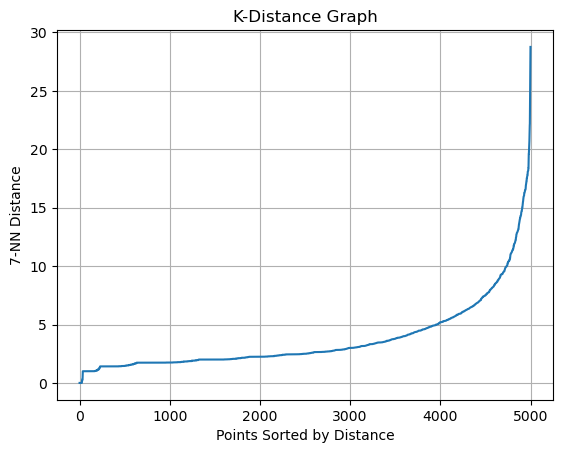

In [49]:
df_dbscan.drop('ZIP Code', axis = 1, inplace=True)

knn = NearestNeighbors(n_neighbors = 4)
model = knn.fit(df_dbscan)
distances, indices = knn.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

<p style="font-size: 16px">Comme nous l’avons vu précédemment nous allons choisir un ε de tel sorte que 90% des observations aient une distance au proche voisin inférieure à ε. Dans notre exemple 25 semble convenir.</p>

<p style="font-size: 16px">Maintenant que nous avons optimisé notre ε nous pouvons effectuer notre partitionnement.</p>

In [50]:
dbscan = DBSCAN(eps=25, min_samples=2*df_dbscan.shape[1], metric='euclidean')  # You can adjust min_samples as well

y_pred = dbscan.fit_predict(df_dbscan)

labels = dbscan.labels_

df_dbscan['dbscan'] = dbscan.labels_
df_dbscan

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dbscan
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,0


In [51]:
df_dbscan['dbscan'].value_counts()

dbscan
 0    3462
 1    1240
-1     298
Name: count, dtype: int64

<p style="font-size: 16px">L’algorithme a donc détecté 2 principaux clusters et quelques anomalies. Chacune des observations est étiquetée avec l’étiquette du cluster correspondant (par exemple 0,1). Les anomalies sont étiquetées en -1 et forment donc une classe à part en plus des 2 clusters détectés. </p>

<h3>Interpretation du resultat de DBSCAN.</h3>

<p style="font-size: 16px">Nous utiliserons le score de silhouette pour évaluer DBSCAN. Le score de silhouette est dans la plage de -1 à 1. Un score proche de 1 indique le meilleur, ce qui signifie que le point de données i est très compact à l'intérieur du cluster auquel il appartient et loin des autres clusters. La valeur la plus basse est -1. Les valeurs proches de 0 indiquent des clusters superposés.</p>

In [53]:
silhouette_avg = silhouette_score(df_dbscan, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.560321464005453


<p style="font-size: 16px">Le score de silhouette de 0.56 indique que les clusters formés par l'algorithme DBSCAN ont une certaine cohésion, ce qui signifie que les points au sein de chaque cluster sont relativement proches les uns des autres. Cependant, il y a probablement une certaine chevauchement entre les clusters, car le score n'est pas très proche de 1, ce qui représenterait une séparation nette entre les clusters.</p>

C:\Users\Mossa\AppData\Local\Temp\ipykernel_14184\1807790850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dbscan', y='CCAvg', data=df_dbscan, palette='Set2')


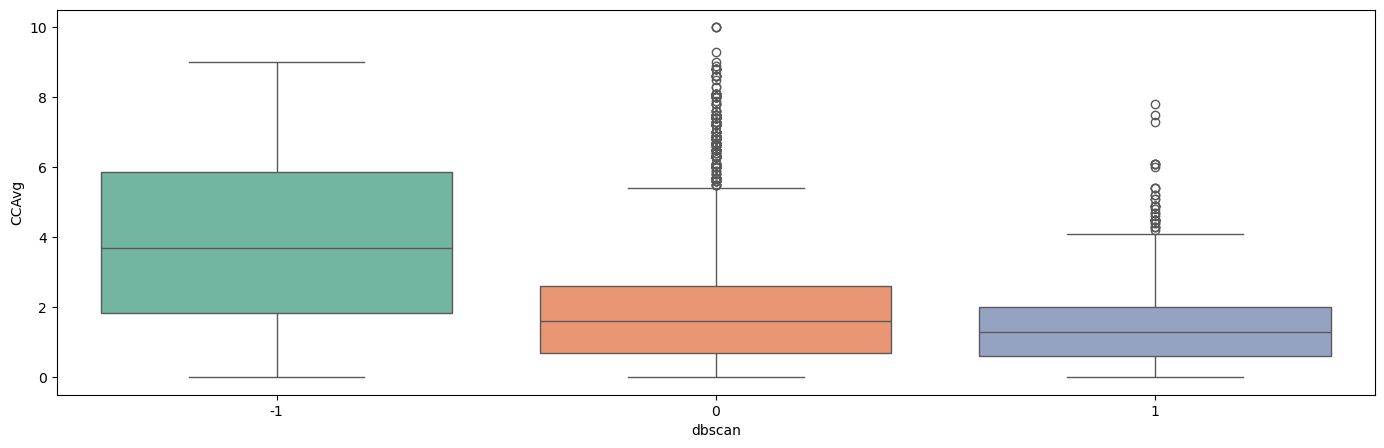

In [60]:
plt.figure(figsize=(17, 5))
sns.boxplot(x='dbscan', y='CCAvg', data=df_dbscan, palette='Set2')
plt.show()

Text(0.5, 1.0, 'Personal Loan vs CCAvg par cluster (DBSCAN)')

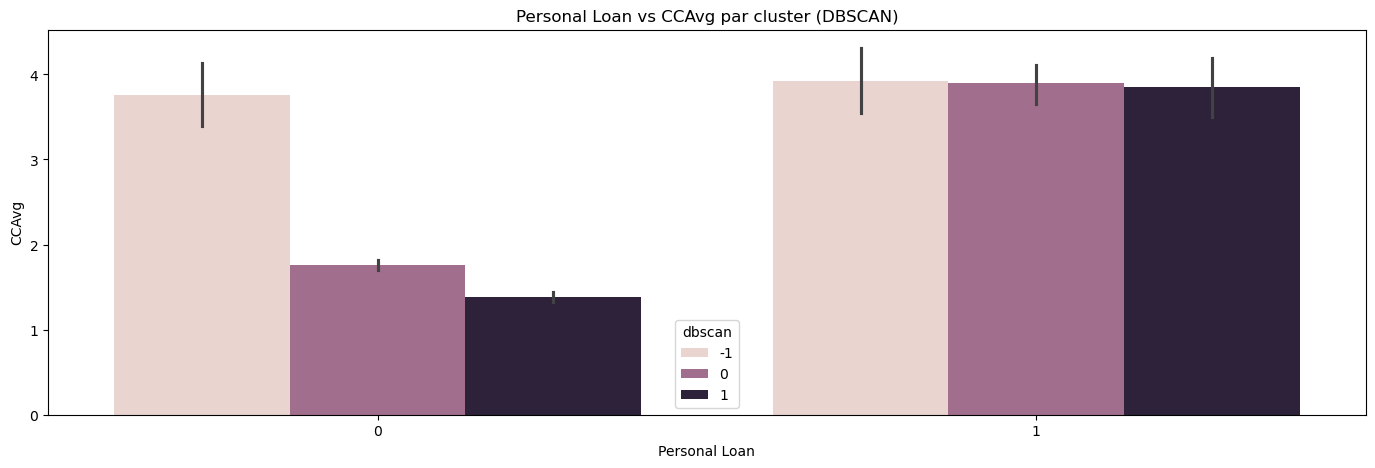

In [62]:
fig, ax1 = plt.subplots(figsize=(17, 5))
sns.barplot(data=df_dbscan, x='Personal Loan', y='CCAvg', hue='dbscan', ax=ax1)
ax1.set_title('Personal Loan vs CCAvg par cluster (DBSCAN)')

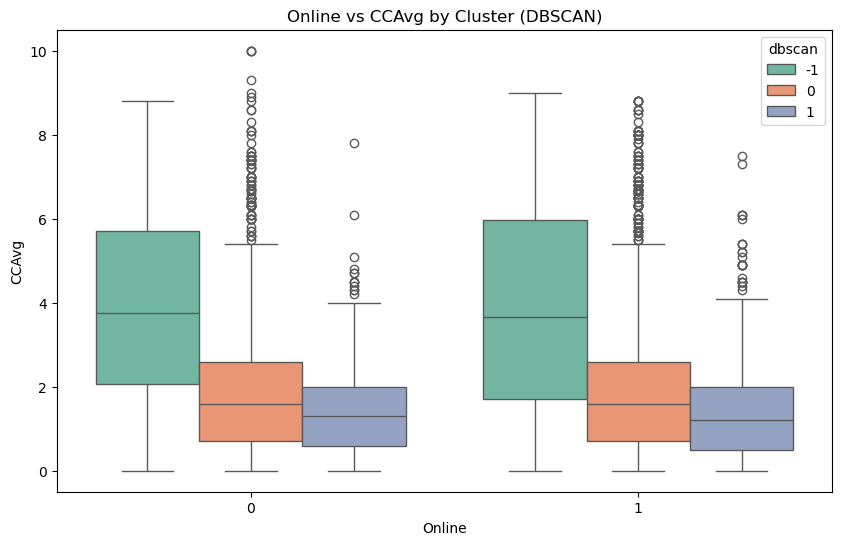

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dbscan, x='Online', y='CCAvg', hue='dbscan', palette='Set2')
plt.title('Online vs CCAvg by Cluster (DBSCAN)')
plt.xlabel('Online')
plt.ylabel('CCAvg')
plt.show()
